In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import hvplot.pandas
import holoviews as hv

In [6]:
income_data = pd.read_csv("Cleaned Data/Median_Income.csv")
vaccination_data = pd.read_csv("Cleaned Data/Vaccination_Rates.csv")

print(income_data.columns)
print(vaccination_data.columns)

Index(['NEIGHBORHOOD', 'MEDIAN INCOME', 'POPULATION PER SQMI', 'income level'], dtype='object')
Index(['CITY_TYPE', 'CITY', 'COMMUNITY', 'LABEL', 'City_Community', 'Cases',
       'Case_Rate', 'Deaths', 'Death_Rate', 'Percent_of_People_with_1__Dose',
       'Percent_of_People_Fully_Vaccinated'],
      dtype='object')


In [10]:
income_data = income_data.rename(columns={'NEIGHBORHOOD':'Neighborhood', 'MEDIAN INCOME':'Median Income', 'POPULATION PER SQMI':'Population Per SQMI', 'income level':'Income Level'})
vaccination_data = vaccination_data.rename(columns={"Death_Rate":"Death Rate", "Case_Rate":"Case Rate", "Percent_of_People_Fully_Vaccinated":"Percent of People Fully Vaccinated"})
print(income_data.columns)
print(vaccination_data.columns)

Index(['Neighborhood', 'Median Income', 'Population Per SQMI', 'Income Level'], dtype='object')
Index(['CITY_TYPE', 'CITY', 'COMMUNITY', 'LABEL', 'City_Community', 'Cases',
       'Case Rate', 'Deaths', 'Death Rate', 'Percent_of_People_with_1__Dose',
       'Percent of People Fully Vaccinated'],
      dtype='object')


In [12]:
allData = pd.merge(vaccination_data, income_data, left_on="CITY", right_on="Neighborhood")
allData = allData[["Cases", "Case Rate", "Deaths", "Death Rate", "Percent_of_People_with_1__Dose", "Percent of People Fully Vaccinated", "Neighborhood", "Median Income", "Population Per SQMI", "Income Level"]]
allData.head()

,Cases,Case Rate,Deaths,Death Rate,Percent_of_People_with_1__Dose,Percent of People Fully Vaccinated,Neighborhood,Median Income,Population Per SQMI,Income Level
0,4220,20208.0,22,105.0,0.85,0.80,Agoura Hills,117608,2495,high
1,17044,19653.0,255,294.0,0.87,0.81,Alhambra,53224,11275,medium
2,8145,14103.0,165,286.0,0.91,0.84,Arcadia,75808,4749,high
3,4186,24924.0,88,524.0,0.87,0.80,Artesia,60538,10036,medium
4,63,1628.0,0,0.0,0.27,0.23,Avalon,53200,1159,medium


In [13]:
def makeScatter(allData, x_col, y_col):
    # fix 0 or inf values
    allData = allData.replace([np.inf, -np.inf, np.nan], 0)
    
    # set x and y lists
    x = allData[x_col]
    y = allData[y_col]
    
    # linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, (slope * x) + intercept, color='red', label='Linear Regression')
    
    # scatter plt
    plt.scatter(x, y, alpha=0.5, edgecolor='black')
    
    # label plt
    plt.title(x_col + " vs " + y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    # show plt
    plt.show()
    
    # corelation and P-Value
    print(f"linear regression line: y = {slope:.2f}x + {intercept:.2f}")
    print('Correlation coefficient (r):', r_value)
    print('p-value:', p_value)
    
    return [slope, intercept, r_value, p_value, std_err]

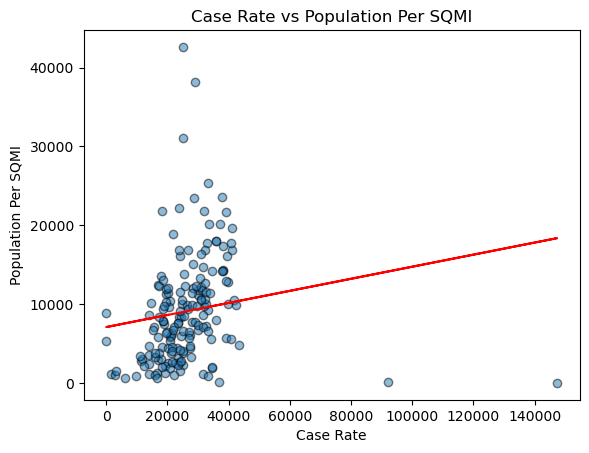

linear regression line: y = 0.08x + 7096.13
Correlation coefficient (r): 0.15296006751160585
p-value: 0.044523446573589906


In [14]:
temp = makeScatter(allData, "Case Rate", "Population Per SQMI")

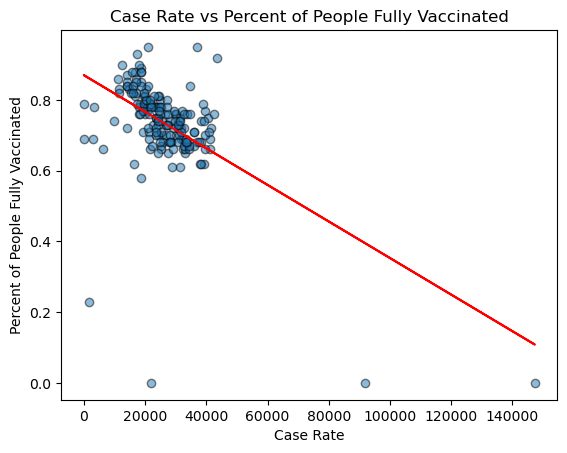

linear regression line: y = -0.00x + 0.87
Correlation coefficient (r): -0.5550558925771399
p-value: 2.287718856042481e-15


In [15]:
temp = makeScatter(allData, "Case Rate", "Percent of People Fully Vaccinated")

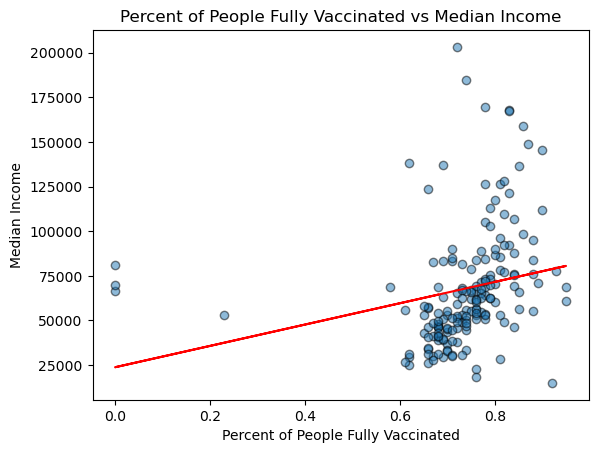

linear regression line: y = 59744.98x + 23784.05
Correlation coefficient (r): 0.22739791522998073
p-value: 0.0026229199174072717


In [16]:
temp = makeScatter(allData, "Percent of People Fully Vaccinated", "Median Income")

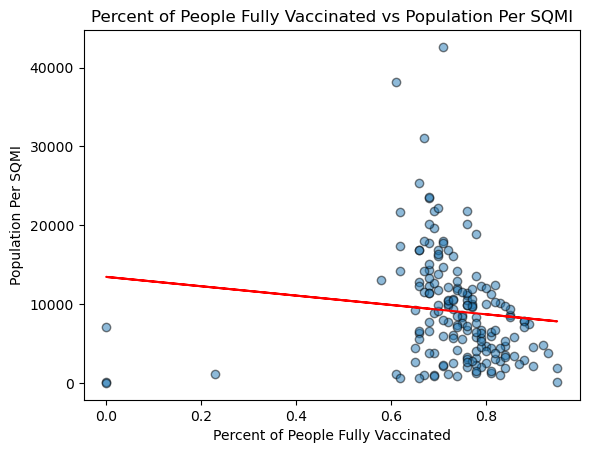

linear regression line: y = -5927.63x + 13458.59
Correlation coefficient (r): -0.11033299052517513
p-value: 0.14843005684384172


In [17]:
temp = makeScatter(allData, "Percent of People Fully Vaccinated", "Population Per SQMI")

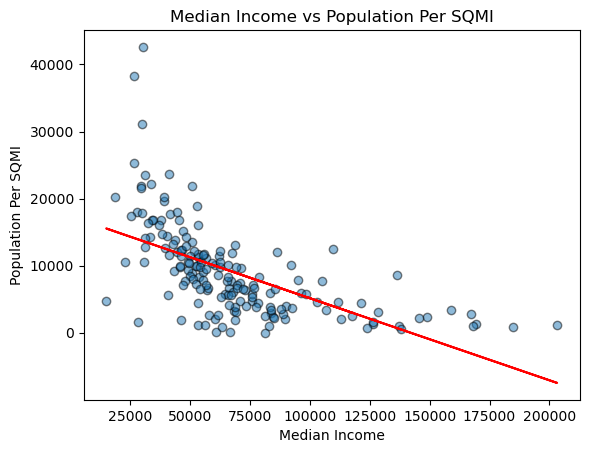

linear regression line: y = -0.12x + 17383.82
Correlation coefficient (r): -0.5983707151622786
p-value: 3.507052238872573e-18


In [18]:
temp = makeScatter(allData, "Median Income", "Population Per SQMI")